<a href="https://colab.research.google.com/github/aashish3808/generative-ai-for-beginners/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5242 - loss: 0.7354 - val_accuracy: 0.7807 - val_loss: 0.6434
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5269 - loss: 0.7275 - val_accuracy: 0.8158 - val_loss: 0.6277
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5982 - loss: 0.6905 - val_accuracy: 0.8947 - val_loss: 0.6086
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6041 - loss: 0.6526 - val_accuracy: 0.9123 - val_loss: 0.5878
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6494 - loss: 0.6246 - val_accuracy: 0.9474 - val_loss: 0.5665
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6753 - loss: 0.6264 - val_accuracy: 0.9474 - val_loss: 0.5413
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6852 - loss: 0.6158 - val_accuracy: 0.9474 - val_loss: 0.5125
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7205 - loss: 0.5903 - val_accuracy: 0.9474 - val_loss: 0.4758
Epoc

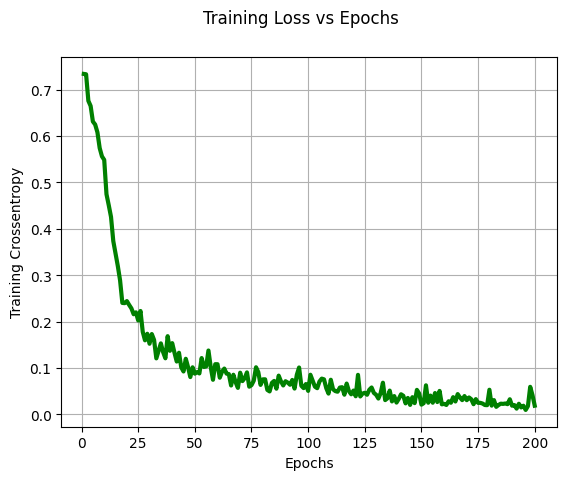

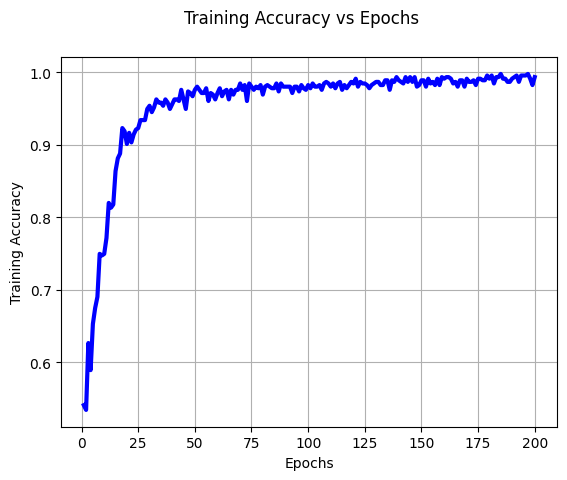

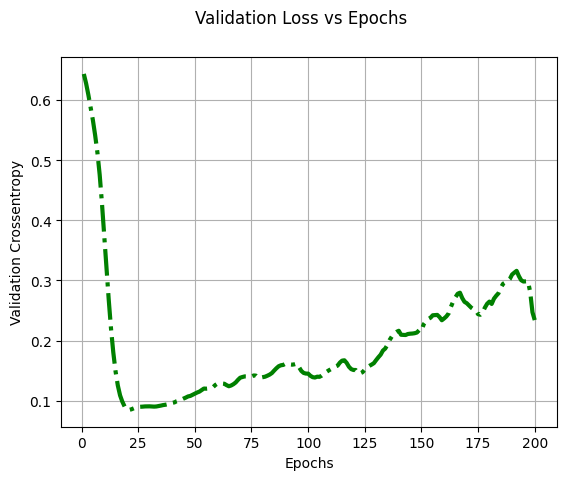

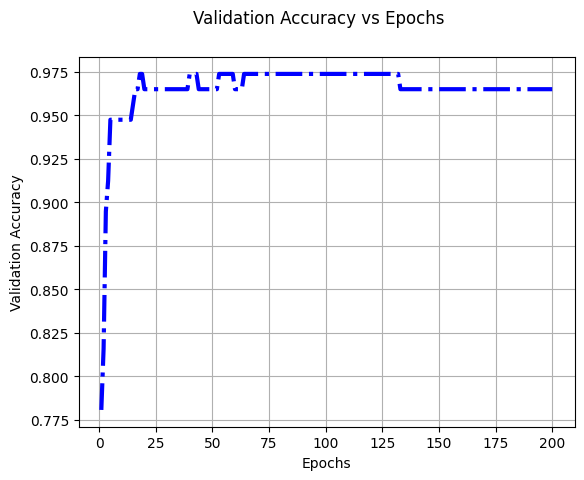

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
from keras.layers import Dropout

bcancer = datasets.load_breast_cancer()

X = bcancer.data
y = bcancer.target

scaler = StandardScaler();
X = scaler.fit_transform(X)


ss = StandardScaler()
X = ss.fit_transform(X)
y=y.reshape(569,1)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state=11)

oh = OneHotEncoder()
ytrain = oh.fit_transform(ytrain).toarray()

model = Sequential()
model.add(Dense(64, input_shape=(30,), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


ytestoh = oh.fit_transform(ytest).toarray()
history = model.fit(Xtrain, ytrain, epochs=200, batch_size=100, validation_data=(Xtest,ytestoh))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')



import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()



import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()


import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()



import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()

# model = Sequential()
# model.add(Dense(128, input_dim=20, activation="relu"))
# model.add(Dense(64, activation="relu"))
# model.add(Dense(16, activation="relu"))
# model.add(Dense(4, activation="softmax"))
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
